In [41]:
import pandas as pd
import numpy as np

col_list = ['COMPANY_FKEY','GOING_CONCERN','OPINION_TEXT1','OPINION_TEXT2','OPINION_TEXT3']
bank_data = pd.read_csv('data/Audit Analytics 01.2010.csv', usecols=col_list)
# GOING_CONCERN

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (178) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
bank_data.head()

,GOING_CONCERN,COMPANY_FKEY,OPINION_TEXT1,OPINION_TEXT2,OPINION_TEXT3
0,0.0,20.0,Report of Independent Registered Public Accoun...,NaN,NaN
1,0.0,1750.0,Report of Independent Registered Public Accoun...,NaN,NaN
2,0.0,1750.0,Report of Independent Registered Public Accoun...,NaN,NaN
3,0.0,1750.0,Report of Independent Registered Public Accoun...,NaN,NaN
4,0.0,1750.0,Report of Independent Registered Public Accoun...,NaN,NaN


In [3]:
val_counts = bank_data['GOING_CONCERN'].value_counts()
print(val_counts)

op1_nulls = bank_data['OPINION_TEXT1'].isnull().sum() # 166617 items
op2_nulls = bank_data['OPINION_TEXT2'].isnull().sum() # 15 items
op3_nulls = bank_data['OPINION_TEXT3'].isnull().sum() # 3 items
print('Op1: ', op1_nulls)
print('Op2: ', op2_nulls)
print('Op2: ', op3_nulls)


0.0    139699
1.0     26915
Name: GOING_CONCERN, dtype: int64
Op1:  0
Op2:  166602
Op2:  166614


## Remove all entries that span more than one 'OPINION TEXT'

In [40]:
# get rid of all values with op2 
df_filtered = bank_data[bank_data['OPINION_TEXT2'].isnull()]
df_filtered = df_filtered[['COMPANY_FKEY','GOING_CONCERN','OPINION_TEXT1']]

print(df_filtered)
df_filtered.head()

        COMPANY_FKEY  GOING_CONCERN  \
0               20.0            0.0   
1             1750.0            0.0   
2             1750.0            0.0   
3             1750.0            0.0   
4             1750.0            0.0   
...              ...            ...   
166612     1931055.0            0.0   
166613     1931691.0            1.0   
166614     1933359.0            1.0   
166615     1934945.0            1.0   
166616     1936214.0            0.0   

                                            OPINION_TEXT1  
0       Report of Independent Registered Public Accoun...  
1       Report of Independent Registered Public Accoun...  
2       Report of Independent Registered Public Accoun...  
3       Report of Independent Registered Public Accoun...  
4       Report of Independent Registered Public Accoun...  
...                                                   ...  
166612  Report of Independent Registered Public Accoun...  
166613  REPORT OF INDEPENDENT REGISTERED PUBLIC ACC

,COMPANY_FKEY,GOING_CONCERN,OPINION_TEXT1
0,20.0,0.0,Report of Independent Registered Public Accoun...
1,1750.0,0.0,Report of Independent Registered Public Accoun...
2,1750.0,0.0,Report of Independent Registered Public Accoun...
3,1750.0,0.0,Report of Independent Registered Public Accoun...
4,1750.0,0.0,Report of Independent Registered Public Accoun...


In [48]:
op1_nulls = df_filtered['OPINION_TEXT1'].count() # 166617 items
print(op1_nulls)

NameError: name 'df_filtered' is not defined

In [3]:
# save modified to csv
df_filtered.to_csv('./data/going_concerns.csv')

NameError: name 'df_filtered' is not defined

In [43]:
neg, pos = np.bincount(df_filtered['GOING_CONCERN'])

In [44]:
print('neg: ', neg)
print('pos: ', pos)

neg:  139687
pos:  26915


## Label Explanation
0=no 1=yes	
Indicates the auditor's opinion contains an explanatory paragraph regarding the going concern assumption.

Auditors include an explanitory paragraph when they conclude there is substantial doubt in a company as a 'going concern.'

In [60]:
import os
import random
import shutil

import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load data from CSV file
data = pd.read_csv('data/going_concerns.csv')

# Shuffle data
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

# Split data into training and testing sets
train_ratio = 0.85
test_ratio = 0.15

num_samples = len(data)
train_cutoff = int(num_samples * train_ratio)
# test_cutoff = int((num_samples * test_ratio))

train_data = data.iloc[:train_cutoff]
test_data = data.iloc[train_cutoff:]
# val_data = data.iloc[test_cutoff:]

# Create output directories if they don't exist
output_dir = './data/going_concern_reports'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

train_dir = os.path.join(output_dir, 'train')
if not os.path.exists(train_dir):
    os.makedirs(train_dir)

test_dir = os.path.join(output_dir, 'test')
if not os.path.exists(test_dir):
    os.makedirs(test_dir)

# val_dir = os.path.join(output_dir, 'val')
# if not os.path.exists(val_dir):
#     os.makedirs(val_dir)

# Convert data to the required directory structure
def convert_data(data, dirname):
    for label in [0, 1]:
        label_data = data[data['GOING_CONCERN'] == label]
        label_dir = os.path.join(dirname, str(label))
        # create directory for label if it doesn't exist
        if not os.path.exists(label_dir):
            os.makedirs(label_dir)
        
        
        # create a new text file for each report titled by company id + index
        for idx, row in label_data.iterrows():
            filename = f"{row['COMPANY_FKEY']}_{idx}.txt"
            filepath = os.path.join(label_dir, filename)

            with open(filepath, 'w', encoding='utf-8') as f:
                f.write(row['OPINION_TEXT1'])

convert_data(train_data, train_dir)
convert_data(test_data, test_dir)
# convert_data(val_data, val_dir)


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/evanaholevas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
len(data)
print("train: ", len(train_data))
print("test: ", len(test_data))

train:  141611
test:  24991


## Set testing, training, and validation data

In [1]:
import os
from sklearn.metrics import accuracy_score

# folder path
dir_path2 = 'data/going_concern_reports/train'
count2 = 0
for root_dir, cur_dir, files in os.walk(dir_path2):
    count2 += len(files)
print('Train count:', count2)

# folder path
dir_path = 'data/going_concern_reports/test'
count = 0
for root_dir, cur_dir, files in os.walk(dir_path):
    count += len(files)
print('test count:', count)

Train count: 141611
test count: 24992


In [2]:
import tensorflow as tf

# create validation set
batch_size = 32
seed = 43

raw_train_ds = tf.keras.utils.text_dataset_from_directory(
    'data/going_concern_reports/train', 
    batch_size=batch_size, 
    validation_split=0.17, 
    subset='training', 
    seed=seed)

Found 141611 files belonging to 2 classes.
Using 117538 files for training.


In [5]:
raw_train_ds.info

AttributeError: 'BatchDataset' object has no attribute 'info'

In [15]:
for text_batch, label_batch in raw_train_ds.take(1):
  for i in range(3):
    print("Review", text_batch.numpy()[i])
    print("Label", label_batch.numpy()[i])

Review b'Report of Independent Registered Public Accounting Firm   <p> <p>   The Board of Directors and Stockholders  Summit Hotel Properties, Inc.:     We have audited the accompanying consolidated balance sheets of Summit Hotel Properties, Inc. and subsidiaries (the Company) as of December 31, 2012 and 2011, and the related consolidated statements of operations, comprehensive income (loss), and changes in equity for the year ended December 31, 2012 and the period from February 14, 2011 (commencement of operations) through December 31, 2011, the related consolidated statements of operations, comprehensive income (loss) and changes in equity of Summit Hotel Properties, LLC and subsidiaries (Predecessor) for the period from January 1, 2011 through February 13, 2011 and the year ended December 31, 2010, the related consolidated statement of cash flows of Summit Hotel Properties, Inc. and subsidiaries for the year ended December 31, 2012, the related combined consolidated statement of cas

In [3]:
raw_val_ds = tf.keras.utils.text_dataset_from_directory(
    'data/going_concern_reports/train', 
    batch_size=batch_size, 
    validation_split=0.17,
    subset='validation', 
    seed=seed)

Found 141611 files belonging to 2 classes.
Using 24073 files for validation.


In [8]:
raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'data/going_concern_reports/test', 
    batch_size=batch_size)

Found 24991 files belonging to 2 classes.


## Preprocess and clean text
Standardize, vectorize, and remove HTML elements.

In [59]:
import string 
import regex as re

# remove HTML tags from the text, remove punctuation, and convert to lowercase
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)
  stripped_html = tf.strings.regex_replace(lowercase, '<p>', ' ')
  return tf.strings.regex_replace(stripped_html,
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

In [57]:
max_features = 10000
sequence_length = 250

vectorize_layer = tf.keras.layers.TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length)

In [58]:
# convert text to numbers without labels, then adapt to the data
train_text = raw_train_ds.map(lambda x, y: x)
vectorize_layer.adapt(train_text)

ValueError: in user code:

    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/base_preprocessing_layer.py", line 122, in adapt_step  *
        self._adapt_maybe_build(data)
    File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/base_preprocessing_layer.py", line 284, in _adapt_maybe_build  **
        data_shape_nones = tuple([None] * len(data.shape))

    ValueError: Cannot take the length of shape with unknown rank.


In [7]:
# preview the preprocessed data
def vectorize_text(text, label):
  text = tf.expand_dims(text, -1)
  return vectorize_layer(text), label

In [8]:
# retrieve a batch of 32 going concern reports and labels from the dataset
text_batch, label_batch = next(iter(raw_train_ds))
first_review, first_label = text_batch[0], label_batch[0]
print("Review", first_review)
print("Label", raw_train_ds.class_names[first_label])
print("Vectorized review", vectorize_text(first_review, first_label))

Review tf.Tensor(b'REPORT OF INDEPENDENT REGISTERED PUBLIC ACCOUNTING FIRM<p>To the Shareholders and the Board of Directors of BNY Mellon Strategic Municipals, Inc.<p>Opinion on the Financial Statements<p>We have audited the accompanying statement of assets and liabilities of BNY Mellon Strategic Municipals, Inc. (the \xe2\x80\x9cFund\xe2\x80\x9d), including the statement of investments, as of September 30, 2020, and the related statements of operations and cash flows for the year then ended, the statements of changes in net assets for each of the two years in the period then ended, the financial highlights for each of the five years in the period then ended and the related notes (collectively referred to as the \xe2\x80\x9cfinancial statements\xe2\x80\x9d). In our opinion, the financial statements present fairly, in all material respects, the financial position of the Fund at September 30, 2020, the results of its operations and its cash flows for the year then ended, the changes in i

In [16]:
print("1287 ---> ",vectorize_layer.get_vocabulary()[3])
print(" 313 ---> ",vectorize_layer.get_vocabulary()[2])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  of
 313 --->  the
Vocabulary size: 10000


In [24]:
# apply text vectorization layer

train_ds = raw_train_ds.map(vectorize_text)
val_ds = raw_val_ds.map(vectorize_text)
test_ds = raw_test_ds.map(vectorize_text)

In [25]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Create Neural Network
Text Classification

In [27]:
embedding_dim = 16

In [29]:
# define the model
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(max_features + 1, embedding_dim),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.GlobalAveragePooling1D(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(1)])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 16)          160016    
                                                                 
 dropout_2 (Dropout)         (None, None, 16)          0         
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dropout_3 (Dropout)         (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
________________________________________________

In [37]:
# binary cross entropy loss function for binary classification of text
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=tf.metrics.BinaryAccuracy(threshold=0.5))

In [38]:
# train the model
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs)

Epoch 1/10
3674/3674 [==============================] - 19s 5ms/step - loss: 0.0968 - binary_accuracy: 0.9615 - val_loss: 0.1050 - val_binary_accuracy: 0.9597
Epoch 2/10
3674/3674 [==============================] - 18s 5ms/step - loss: 0.0954 - binary_accuracy: 0.9619 - val_loss: 0.1049 - val_binary_accuracy: 0.9600
Epoch 3/10
3674/3674 [==============================] - 20s 5ms/step - loss: 0.0943 - binary_accuracy: 0.9625 - val_loss: 0.1045 - val_binary_accuracy: 0.9602
Epoch 4/10
3674/3674 [==============================] - 22s 6ms/step - loss: 0.0935 - binary_accuracy: 0.9625 - val_loss: 0.1044 - val_binary_accuracy: 0.9607
Epoch 5/10
3674/3674 [==============================] - 20s 5ms/step - loss: 0.0926 - binary_accuracy: 0.9634 - val_loss: 0.1043 - val_binary_accuracy: 0.9607
Epoch 6/10
3674/3674 [==============================] - 19s 5ms/step - loss: 0.0914 - binary_accuracy: 0.9634 - val_loss: 0.1042 - val_binary_accuracy: 0.9610
Epoch 7/10
3674/3674 [========================

## Evaluate the Model

In [39]:
loss, accuracy = model.evaluate(test_ds)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

781/781 [==============================] - 1s 2ms/step - loss: 0.1011 - binary_accuracy: 0.9601
Loss:  0.10109750181436539
Accuracy:  0.9600656032562256


## Plot accuracy and loss over time

In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

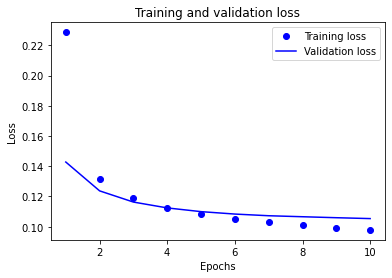

In [35]:
import matplotlib.pyplot as plt

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

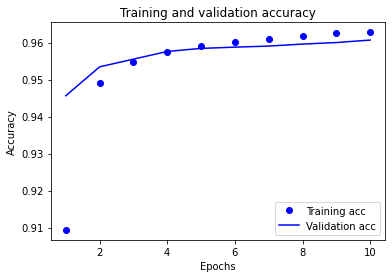

In [36]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

## Export Model
Include text vectorization inside of the model as a layer

In [40]:
export_model = tf.keras.Sequential([
  vectorize_layer,
  model,
  tf.keras.layers.Activation('sigmoid')
])

export_model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# Testing with the raw input `raw_test_ds`
loss, accuracy = export_model.evaluate(raw_test_ds)
print(accuracy)

781/781 [==============================] - 5s 6ms/step - loss: 0.1011 - accuracy: 0.9596
0.9596254825592041


In [53]:
# grab the unseen data from the set (Reports that spanned more than one OPINION_TEXT)
# select where the OPINION_TEXT2 is not null

df_unseen = bank_data[bank_data['OPINION_TEXT2'].notnull()]

# create a new text file that combines the OPINION_TEXT columns
# Convert data to the required directory structure
def convert_unseen(data, dirname):
    
    for label in [0, 1]:
        label_data = data[data['GOING_CONCERN'] == label]
        label_dir = os.path.join(dirname, str(label))
        # create directory for label if it doesn't exist
        if not os.path.exists(label_dir):
            os.makedirs(label_dir)
        
        
        # create a new text file for each report titled by company id + index
        for idx, row in label_data.iterrows():
            temp_data = row['OPINION_TEXT1'] + ' ' + row['OPINION_TEXT2']
            # if row['OPINION_TEXT3'].notnull():
            #     temp_data = temp_data + ' ' + row['OPINION_TEXT3']
            filename = f"{row['COMPANY_FKEY']}_{idx}.txt"
            filepath = os.path.join(label_dir, filename)

            with open(filepath, 'w', encoding='utf-8') as f:
                f.write(temp_data)

convert_unseen(df_unseen, 'data/unseen_going_concern')

       GOING_CONCERN  COMPANY_FKEY  \
12734            0.0      313807.0   
25487            0.0      806968.0   
26256            0.0      811809.0   
31747            0.0      856341.0   
31748            0.0      856341.0   
31749            0.0      856341.0   
31750            0.0      856341.0   
31751            NaN           NaN   
31752            0.0      856341.0   
31753            NaN           NaN   
31754            0.0      856341.0   
31755            NaN           NaN   
40620            0.0      906564.0   
40621            0.0      906564.0   
40622            0.0      906564.0   

                                           OPINION_TEXT1  \
12734  Consolidated financial statements of the bp gr...   
25487  INDEPENDENT AUDITOR'S REPORT  TO THE MEMBERS O...   
26256  3.6 Independent Auditors' reports  Independent...   
31747  REPORT OF INDEPENDENT REGISTERED PUBLIC ACCOUN...   
31748  REPORT OF INDEPENDENT REGISTERED PUBLIC ACCOUN...   
31749  REPORT OF INDEPENDENT RE

In [69]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

# Set up the test data
test_dir = 'data/going_concern_reports/test'
batch_size = 32
test_data = tf.keras.preprocessing.text_dataset_from_directory(
    test_dir,
    batch_size=batch_size)

# Make predictions on the test set
y_pred = export_model.predict(raw_test_ds)

# Get the true labels
y_true = []
for _, labels in test_data:
    y_true.extend(labels.numpy())

Found 24991 files belonging to 2 classes.
781/781 [==============================] - 4s 6ms/step


In [73]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

# Set up the test data
test_dir = 'data/going_concern_reports/test'
batch_size = 32
test_data = tf.keras.preprocessing.text_dataset_from_directory(
    test_dir,
    batch_size=batch_size)

# Make predictions on the test set
y_pred = export_model.predict(raw_test_ds)

# Get the true labels
y_true = []
for _, labels in test_data:
    y_true.extend(labels.numpy())

# Convert probabilities to binary labels
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate precision, recall, and f1 score
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)


Found 24991 files belonging to 2 classes.
781/781 [==============================] - 4s 6ms/step
Precision: 0.1655811623246493
Recall: 0.16125884362039522
F1 score: 0.16339142256828576


In [77]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix

# Set up the test data
test_dir = 'data/going_concern_reports/test'
batch_size = 32
test_data = tf.keras.preprocessing.text_dataset_from_directory(
    test_dir,
    batch_size=batch_size)

# Make predictions on the test set
y_pred = export_model.predict(raw_test_ds)

# Get the true labels
y_true = []
for _, labels in test_data:
    y_true.extend(labels.numpy())

# Convert probabilities to binary labels
y_pred = [1 if p >= 0.5 else 0 for p in y_pred]

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Calculate precision, recall, and f1 score
TN, FP, FN, TP = cm.ravel()
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)

print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Found 24991 files belonging to 2 classes.
781/781 [==============================] - 5s 6ms/step
Precision: 0.16357715430861725
Recall: 0.15930714808489876
F1 score: 0.16141391669756522
